In [1]:
# Importing packages
import mne
import numpy as np
import pandas as pd
import neurokit2 as nk
import os
import seaborn as sns

In [2]:
# Loading recording and hypnograph files using mne package
rec_1 = mne.io.read_raw_edf('data/Used data/subject1_rec.edf', preload=True)
hyp_1 = mne.io.read_raw_edf('data/Used data/subject1_hyp.edf', preload=True)

rec_2 = mne.io.read_raw_edf('data/Used data/subject2_rec.edf', preload=True)
hyp_2 = mne.io.read_raw_edf('data/Used data/subject2_hyp.edf', preload=True)

rec_3 = mne.io.read_raw_edf('data/Used data/subject3_rec.edf', preload=True)
hyp_3 = mne.io.read_raw_edf('data/Used data/subject3_hyp.edf', preload=True)

rec_4 = mne.io.read_raw_edf('data/Used data/subject4_rec.edf', preload=True)
hyp_4 = mne.io.read_raw_edf('data/Used data/subject4_hyp.edf', preload=True)

Extracting EDF parameters from /home/aumarcial/private/Final proj/data/Used data/subject1_rec.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...
Extracting EDF parameters from /home/aumarcial/private/Final proj/data/Used data/subject1_hyp.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2830  =      0.000 ... 84900.000 secs...
Extracting EDF parameters from /home/aumarcial/private/Final proj/data/Used data/subject2_rec.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8549999  =      0.000 ... 85499.990 secs...
Extracting EDF parameters from /home/aumarcial/private/Final proj/data/Used data/subject2_hyp.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2850  =      0.000 ... 85500.000 secs...
Extracting EDF parameters from /home/a

In [3]:
# Getting data using mne package, selecting only eeg,eog and emg data and turning it into dataframes
rec_1_df = pd.DataFrame(rec_1.get_data(picks=['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG Submental']))
hyp_1_df = pd.DataFrame(hyp_1.get_data())

rec_2_df = pd.DataFrame(rec_2.get_data(picks=['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG Submental']))
hyp_2_df = pd.DataFrame(hyp_2.get_data())

rec_3_df = pd.DataFrame(rec_3.get_data(picks=['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG Submental']))
hyp_3_df = pd.DataFrame(hyp_3.get_data())

rec_4_df = pd.DataFrame(rec_4.get_data(picks=['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG Submental']))
hyp_4_df = pd.DataFrame(hyp_4.get_data())

# What it looks like right now
rec_1_df

,0,1,2,3,4,5,6,7,8,9,...,8489990,8489991,8489992,8489993,8489994,8489995,8489996,8489997,8489998,8489999
0,-4.893742e-05,-0.000009,-0.000033,-0.000024,-0.000035,-0.000028,-0.000027,-0.000016,-0.000032,-3.010291e-05,...,-0.000010,0.000018,0.000019,0.000008,0.000016,-0.000006,0.000015,0.000027,0.000051,5.031815e-07
1,6.454566e-08,-0.000003,-0.000001,-0.000001,0.000003,0.000003,0.000002,0.000002,0.000001,-8.187686e-07,...,-0.000020,-0.000026,-0.000026,-0.000026,-0.000022,-0.000022,-0.000024,-0.000024,-0.000026,1.003067e-06
2,3.499130e-05,0.000039,0.000052,0.000053,0.000048,0.000031,0.000027,0.000021,0.000023,1.136423e-05,...,0.000068,0.000085,0.000050,0.000116,0.000089,0.000099,0.000087,0.000062,0.000120,5.150683e-07
3,4.023984e+00,4.047207,4.069790,4.091729,4.113020,4.133659,4.153644,4.172973,4.191644,4.209656e+00,...,3.757817,3.787102,3.815816,3.843950,3.871495,3.898444,3.924788,3.950521,3.975635,4.000124e+00


In [4]:
# Creating row names
channel_names = list(rec_1.info['ch_names'])
row_names = [channel_names[0],channel_names[1],channel_names[2],channel_names[4],'Hyp']
row_names

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG Submental', 'Hyp']

In [5]:
# Creating function to expand hyp counts to match recordings
def hyp_3000(df):

    df = df.drop(0,axis=1)
    original_list = list(df.loc[0])

    new_list = []
    for i in original_list:
        for n in np.arange(0,3000):
            new_list.append(i)
    
    return new_list

In [6]:
# Creating a function to combine hyp and rec data and rename rows

def subject_df(rec_df,hyp_df,subj_number):

    new_df = rec_df.copy()

# Assigning new row to hyp data
    new_df.loc[len(rec_df)] = hyp_3000(hyp_df)

# Assigning column to row names and setting it as index
    new_df = new_df.assign(Description = row_names)
    new_df = new_df.set_index('Description')



    return new_df

In [7]:
# Applying function to create rec+hyp dataframes for each subject
subject1_df = ()
subject1_df = subject_df(rec_1_df,hyp_1_df,'1')

subject2_df = ()
subject2_df = subject_df(rec_2_df,hyp_2_df,'2')

subject3_df = ()
subject3_df = subject_df(rec_3_df,hyp_3_df,'3')

subject4_df = ()
subject4_df = subject_df(rec_4_df,hyp_4_df,'4')

# What it looks like now
subject1_df

,0,1,2,3,4,5,6,7,8,9,...,8489990,8489991,8489992,8489993,8489994,8489995,8489996,8489997,8489998,8489999
Description,,,,,,,,,,,,,,,,,,,,,
EEG Fpz-Cz,-4.893742e-05,-0.000009,-0.000033,-0.000024,-0.000035,-0.000028,-0.000027,-0.000016,-0.000032,-3.010291e-05,...,-0.000010,0.000018,0.000019,0.000008,0.000016,-0.000006,0.000015,0.000027,0.000051,5.031815e-07
EEG Pz-Oz,6.454566e-08,-0.000003,-0.000001,-0.000001,0.000003,0.000003,0.000002,0.000002,0.000001,-8.187686e-07,...,-0.000020,-0.000026,-0.000026,-0.000026,-0.000022,-0.000022,-0.000024,-0.000024,-0.000026,1.003067e-06
EOG horizontal,3.499130e-05,0.000039,0.000052,0.000053,0.000048,0.000031,0.000027,0.000021,0.000023,1.136423e-05,...,0.000068,0.000085,0.000050,0.000116,0.000089,0.000099,0.000087,0.000062,0.000120,5.150683e-07
EMG Submental,4.023984e+00,4.047207,4.069790,4.091729,4.113020,4.133659,4.153644,4.172973,4.191644,4.209656e+00,...,3.757817,3.787102,3.815816,3.843950,3.871495,3.898444,3.924788,3.950521,3.975635,4.000124e+00
Hyp,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00


<Axes: >

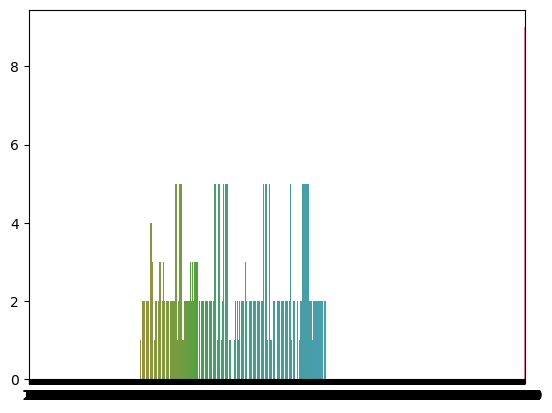

In [8]:
# Files are large but sleep is only in a small portion, need to shorten data
sns.barplot(hyp_2_df)

In [9]:
# Defining function to trim dataframes 5 minutes before and after last non-wake stage
def trim_df(df):

    # Find first and last non-wake index value, also removing non recordings
    dft = df.T
    
    first_sleep = dft[(dft['Hyp'] !=0) & (dft['Hyp'] !=9)].index[0]
    last_sleep = dft[(dft['Hyp'] !=0) & (dft['Hyp'] !=9)].index[-1]

    trimmed_df = df.iloc[:, first_sleep:last_sleep]

    return trimmed_df

In [10]:
# Trimmed dataframes to see which has the longest sleep

trimmed_s1_df = trim_df(subject1_df)

trimmed_s2_df = trim_df(subject2_df)

trimmed_s3_df = trim_df(subject3_df)

trimmed_s4_df = trim_df(subject4_df)

In [11]:
# Now dataframes need to be aligned, 
# The sleep is different lengths so we will re-trim them to the length of the longest sleep
sleep_lengths = [len(trimmed_s1_df.columns), len(trimmed_s2_df.columns), len(trimmed_s3_df.columns), len(trimmed_s4_df.columns)]
longest_sleep_length = max(sleep_lengths)

print(sleep_lengths, longest_sleep_length)


[3023999, 3197999, 2918999, 2045999] 3197999


In [12]:
# Defining alignmnet function
def align_df(df):

    # Find first and last non-wake index value, also removing non recordings
    dft = df.T
    
    first_value = dft[(dft['Hyp'] !=0) & (dft['Hyp'] !=9)].index[0]

    # Subtract 5 mins from first and add longest sleep to start value to get end value
    data_start = first_value - 30000
    data_end = first_value + longest_sleep_length

    aligned_df = df.iloc[:, data_start:data_end]

    return aligned_df

In [13]:
# Aligned datafames, select only EEG, EOG, and EMG data
aligned_s1_df = align_df(subject1_df)

aligned_s2_df = align_df(subject2_df)

aligned_s3_df = align_df(subject3_df)

aligned_s4_df = align_df(subject4_df)

# What it looks like now
aligned_s1_df

,2574000,2574001,2574002,2574003,2574004,2574005,2574006,2574007,2574008,2574009,...,5801989,5801990,5801991,5801992,5801993,5801994,5801995,5801996,5801997,5801998
Description,,,,,,,,,,,,,,,,,,,,,
EEG Fpz-Cz,-0.000018,-0.000013,0.000005,-0.000006,0.000002,-0.000002,-0.000010,-4.949920e-06,-0.000029,-0.000016,...,0.000004,0.000010,-0.000006,-3.685512e-07,0.000007,0.000008,2.508986e-05,9.716823e-06,0.000012,0.000003
EEG Pz-Oz,0.000007,0.000002,-0.000005,-0.000008,-0.000006,-0.000004,-0.000003,-7.206226e-07,0.000005,0.000007,...,-0.000008,-0.000016,-0.000010,-1.898375e-06,0.000005,0.000003,7.515679e-07,6.454566e-08,0.000006,0.000010
EOG horizontal,0.000028,0.000014,0.000029,0.000014,0.000020,0.000009,-0.000023,1.329297e-05,0.000003,0.000025,...,0.000042,0.000044,0.000034,3.209819e-05,0.000027,-0.000006,3.016945e-05,2.390105e-05,0.000035,0.000032
EMG Submental,4.002038,4.003099,4.004188,4.005303,4.006445,4.007612,4.008806,4.010026e+00,4.011271,4.012542,...,4.190281,4.201422,4.212648,4.223951e+00,4.235320,4.246747,4.258220e+00,4.269731e+00,4.281269,4.292824
Hyp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000


In [14]:
# Defining function to rename them to identify subjects (1,2,3,4)
def rename(df,sid):
    new_df = df.copy()
    new_df.index = [f"{idx}_{sid}" for idx in new_df.index]
    return new_df

In [15]:
# Renaming columns so subjects are separated, transposing so columns get added together
at1 = rename(aligned_s1_df,'1').T
at2 = rename(aligned_s2_df,'2').T
at3 = rename(aligned_s3_df,'3').T
at4 = rename(aligned_s4_df,'4').T

at1 = at1.reset_index().drop('index', axis=1)
at2 = at2.reset_index().drop('index', axis=1)
at3 = at3.reset_index().drop('index', axis=1)
at4 = at4.reset_index().drop('index', axis=1)

In [16]:
# Saving to share dataframes, parquet is most efficient, commented out so it doesnt keep saving

#at1.to_parquet("subj1.parquet", engine="pyarrow", compression="zstd")
#at2.to_parquet("subj2.parquet", engine="pyarrow", compression="zstd")
#at3.to_parquet("subj3.parquet", engine="pyarrow", compression="zstd")
#at4.to_parquet("subj4.parquet", engine="pyarrow", compression="zstd")